In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
import yfinance as yf
import pandas as pd
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-02-01'
df = yf.download(ticker, start=start_date, end=end_date)
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: DNSError('Failed to perform, curl: (6) Could not resolve host: query1.finance.yahoo.com. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []


In [3]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,


In [4]:
df=df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


In [5]:
df=df.drop(['Date'],axis=1)
df.head()

C:\Users\nelak\AppData\Local\Temp\ipykernel_16024\3471825329.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date'],axis=1)


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


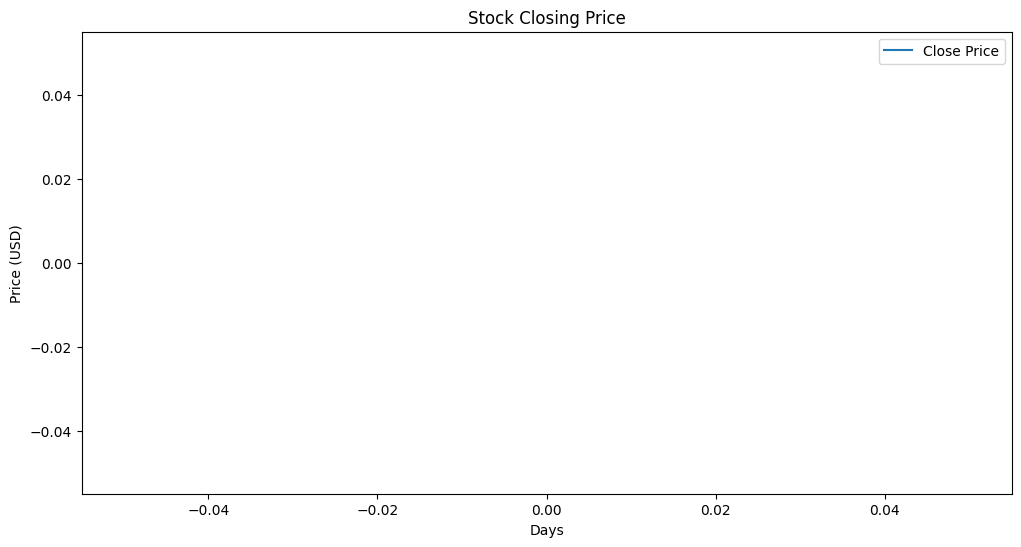

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Price')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [7]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


In [8]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL


In [9]:
df['MA100'] = ma100
df

Price,Adj Close,Close,High,Low,Open,Volume,MA100
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,


### 📊 Stock Price vs 100-Day Moving Average

- **Blue Line**: The actual daily closing price of the stock.
- **Red Line**: The 100-day moving average — a smoothed version of the price trend.
- This helps reduce noise and gives a clearer view of long-term trends.

**Interpretation:**
- If the blue line is above the red line, it often means a positive/upward trend.
- If the blue line dips below the red line, it could signal a downward trend.


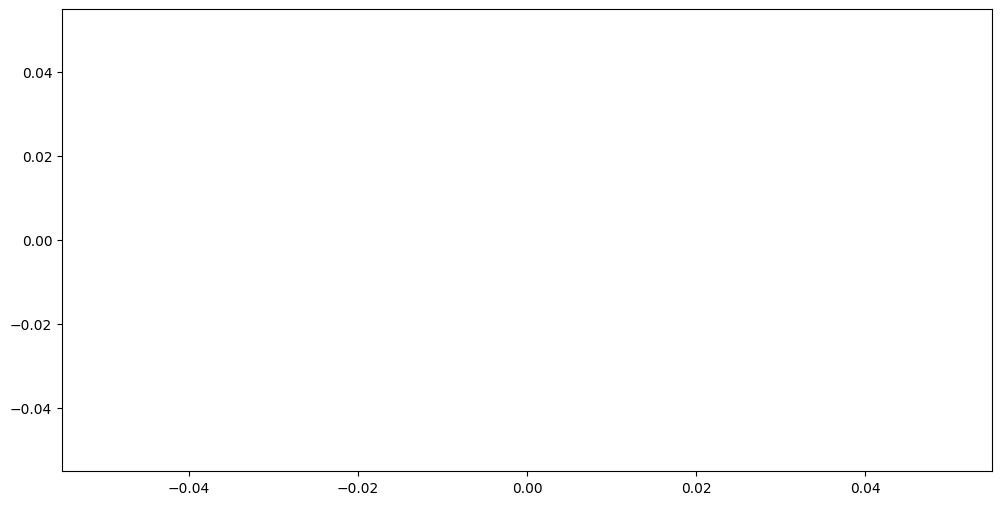

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL


In [12]:
df['MA200'] = ma200
df

Price,Adj Close,Close,High,Low,Open,Volume,MA100,MA200
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,


### 📈 Apple (AAPL) Stock Price & Moving Averages Explained

- **Blue Line**: Daily closing price of the stock.
- **Red Line**: 100-day moving average – helps see short- to medium-term trends.
- **Green Line**: 200-day moving average – shows long-term momentum.

#### 💡 Interpretation:
- When the red line crosses **above** the green → possible **bullish signal**.
- When it crosses **below** → possible **bearish signal**.
- Actual price staying **above both MAs** often confirms an **uptrend**.


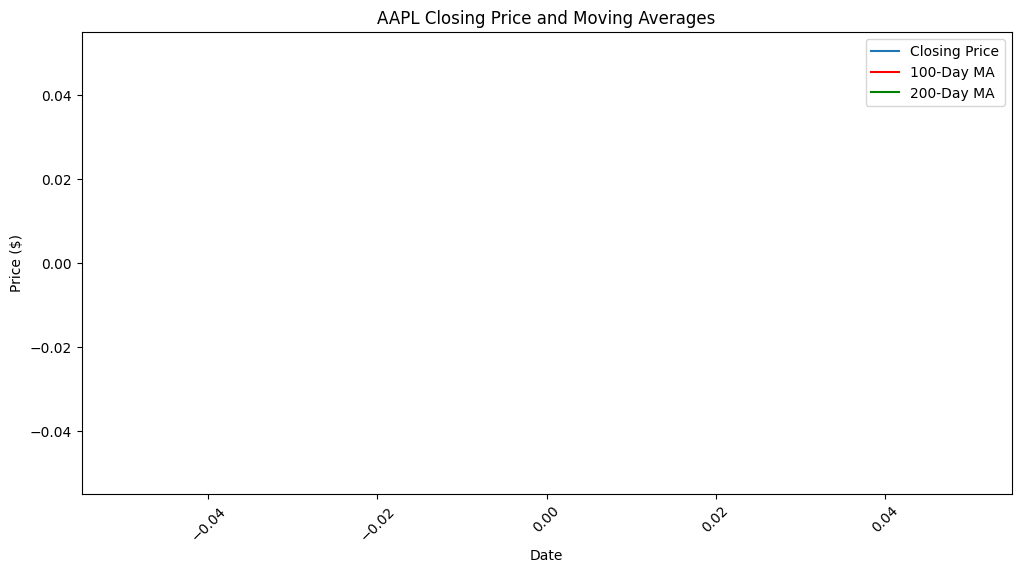

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label='Closing Price')
plt.plot(ma100, 'r', label='100-Day MA')
plt.plot(ma200, 'g', label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('AAPL Closing Price and Moving Averages')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [14]:
df.shape

(0, 8)

In [15]:
#splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(0, 1)
(0, 1)


In [16]:
data_training.head()

Ticker,AAPL


In [17]:
data_testing.head()

Ticker,AAPL


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
x_train=[] #feature class
y_train=[] #predictive class
for i in range(100,data_training_array.shape[0]):
     x_train.append(data_training_array[i-100:i])
     y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(794, 100, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\nelak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.2163
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0213
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0136
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0101
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0110
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0106
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0089
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0094
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0098
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0106
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0083
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0083
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0073
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0080
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - lo

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(100, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save("keras_model.h5")


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.1739
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0043
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0029
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0025
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0020
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0017
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0019
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0018
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0018
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0017
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0018
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0016
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0014
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0015
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0014
Epoc

In [ ]:
data_testing.head()

Ticker,AAPL
894,190.839249
895,191.700638
896,192.571915
897,191.304626
898,193.888748


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

Ticker,AAPL
0,145.747116
1,143.670792
2,144.264038
3,149.326279
4,152.094696


In [ ]:
input_data = scaler.transform(final_df)


In [ ]:
input_data.shape

(484, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
 x_test.append(input_data[i-100:i])
 y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(384, 100, 1)
(384,)


In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\nelak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=(100, 1)),  
    keras.layers.LSTM(50),  
    keras.layers.Dense(1)  
])

C:\Users\nelak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


C:\Users\nelak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.1025 - val_loss: 0.0580
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0086 - val_loss: 0.0219
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0057 - val_loss: 0.0133
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0026 - val_loss: 9.1643e-04
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0024 - val_loss: 4.3391e-04
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0022 - val_loss: 7.5653e-04
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.

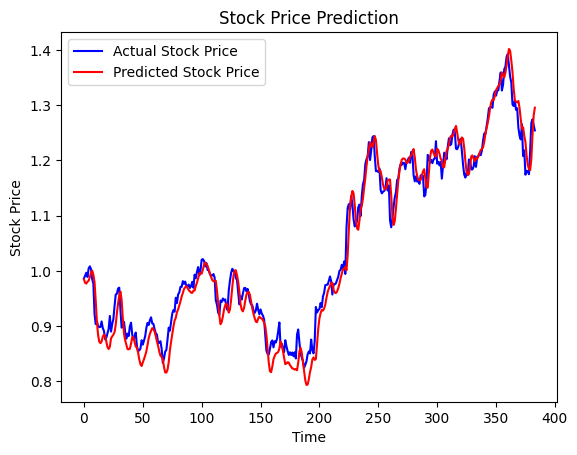

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# --- Scale your y_train before model training ---
scaler = MinMaxScaler(feature_range=(0,1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))  # Fit and transform y_train

# Model definition
model = keras.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    keras.layers.LSTM(50),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train_scaled, epochs=50, batch_size=32, validation_split=0.1)

# Predict
predictions_scaled = model.predict(x_test)

# Inverse transform
predictions_rescaled = scaler.inverse_transform(predictions_scaled)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))  # y_test must be unscaled

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f"Root Mean Squared Error: {rmse}")

# Plot results
plt.plot(y_test_rescaled, color='blue', label='Actual Stock Price')
plt.plot(predictions_rescaled, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
# --- Explainable AI Style Interpretation ---
latest_price = y_test_rescaled[-1][0]
predicted_price = predictions_rescaled[-1][0]

trend = "upward 📈" if predicted_price > latest_price else "downward 📉"
decision = "✅ Good time to consider investing." if predicted_price > latest_price else "⚠️ Might wait before investing."

print("\n🧠 Explainable AI Summary:")
print(f"• Current (last known) closing price: ${latest_price:.2f}")
print(f"• Predicted next closing price: ${predicted_price:.2f}")
print(f"• Model indicates a {trend} trend.")
print(f"• Investment suggestion: {decision}")



🧠 Explainable AI Summary:
• Current (last known) closing price: $1.25
• Predicted next closing price: $1.30
• Model indicates a upward 📈 trend.
• Investment suggestion: ✅ Good time to consider investing.


In [ ]:
# Interpret Moving Averages (Technical Signal)
latest_ma100 = ma100.dropna().values[-1]
latest_ma200 = ma200.dropna().values[-1]

if latest_ma100 > latest_ma200:
    print("• Technical indicator: MA100 > MA200 → Bullish trend confirmed ✅")
else:
    print("• Technical indicator: MA100 < MA200 → Bearish trend, invest with caution ⚠️")


• Technical indicator: MA100 > MA200 → Bullish trend confirmed ✅


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: DNSError('Failed to perform, curl: (6) Could not resolve host: query2.finance.yahoo.com. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


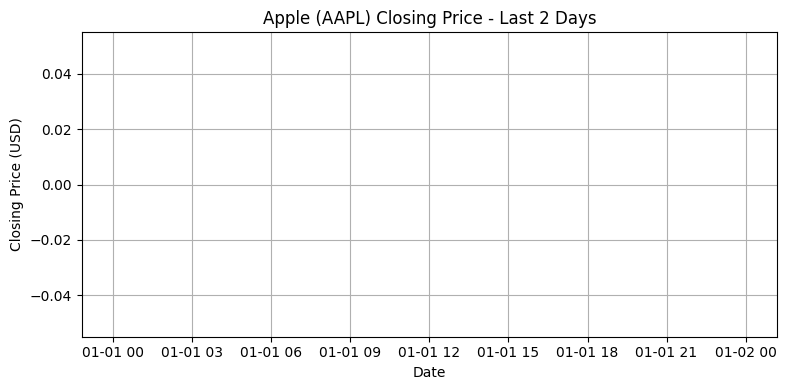

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download stock data for the last 2 days (to ensure you capture yesterday's data)
data = yf.download('AAPL', period='2d', interval='1d')

# Plot the closing price
plt.figure(figsize=(8, 4))
plt.plot(data.index, data['Close'], marker='o', linestyle='-')
plt.title('Apple (AAPL) Closing Price - Last 2 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()
